In [1]:
#import the libraries
import pandas as pd
import math
import pandas_datareader as web
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM ,Dropout
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#MACRO DEF

STOCK = 'MSFT'
EPOCHS = 50
model_path = 'machine learning model/'+STOCK+'_model.pkl'
START_DATE = '2012-01-01'
END_DATE = '2022-02-24'
PREDICT_DATE = '2022-02-24'
ERR_EPOCHS = 120

In [3]:


#get the stock data
df = web.DataReader(STOCK, data_source='yahoo' , start=START_DATE , end=END_DATE)

#show the data
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,26.959999,26.389999,26.549999,26.770000,64731500.0,21.623129
2012-01-04,27.469999,26.780001,26.820000,27.400000,80516100.0,22.132013
2012-01-05,27.730000,27.290001,27.379999,27.680000,56081400.0,22.358177
2012-01-06,28.190001,27.530001,27.530001,28.110001,99455500.0,22.705500
2012-01-09,28.100000,27.719999,28.049999,27.740000,59706800.0,22.406637
...,...,...,...,...,...,...
2022-02-17,296.799988,290.000000,296.359985,290.730011,32461600.0,290.730011
2022-02-18,293.859985,286.309998,293.049988,287.929993,34264000.0,287.929993
2022-02-22,291.540009,284.500000,285.000000,287.720001,41736100.0,287.720001


In [4]:
#get the number of rows and column in the data set
df.shape

(2554, 6)

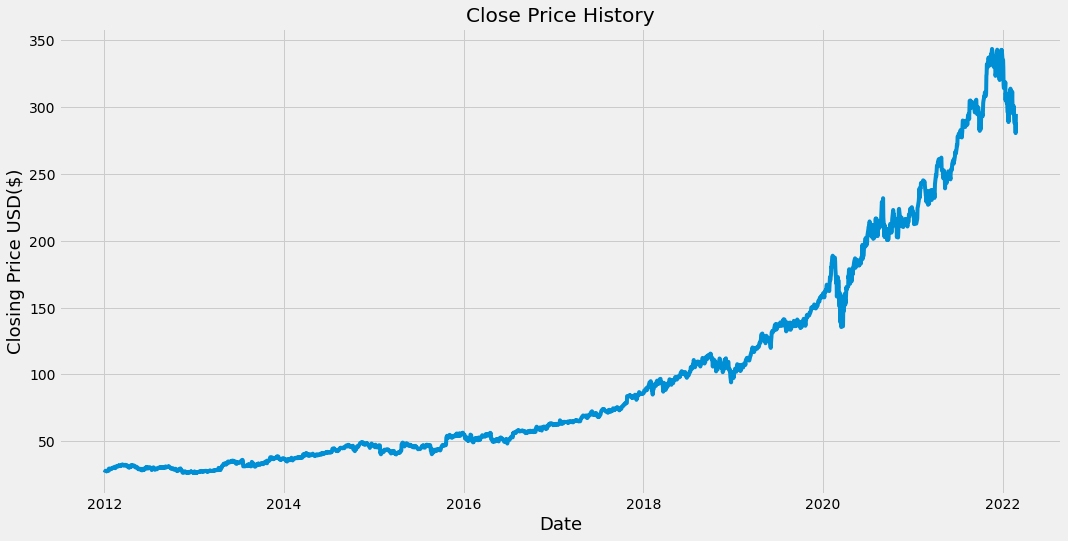

In [5]:
#Visualing the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price USD($)', fontsize=18)
plt.show()

In [6]:
#Create a new data
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)
training_data_len

2044

In [7]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00126286],
       [0.00325187],
       [0.00413588],
       ...,
       [0.82512475],
       [0.80160384],
       [0.84681445]])

In [8]:
#creating the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.01054492, 0.01060807, 0.00937677,
       0.01007135, 0.00988192, 0.00902948, 0.01022921, 0.00997664,
       0.01111321, 0.01130265, 0.01221822, 0.01209194, 0.01256551,
       0.01354423, 0.01389152, 0.01303908, 0.01329166, 0.01224979,
       0.01161836, 0.01553325, 0.01540696, 0.01600682, 0.0154701 ,
       0.01578582, 0.0161331 , 0.01572267, 0.0173644 , 0.01695397,
       0.01869041, 0.01802741, 0.01714339, 0.01638568, 0.01726968,
       0.0178064 , 0.01774326, 0.01790112, 0.01989012, 0.02020585,
       0.02045841, 0.01966912, 0.01840626, 0.01774326, 0.01749068,
       0.01777483, 0.0178064 , 0.01963756, 0.01941656, 0.01837469])]
[0.018153685590104426]

[array([0.00126286, 0.00325187, 0.00413588, 0.00549346, 0.00432531,
       0.00464103, 0.00426217, 0.00514617, 0.00593547, 0.00596704,
       0.00587232, 0.00552504, 0.0

In [9]:
#Convert the X_train and Y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1984, 60, 1)

In [20]:
#Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape =(x_train.shape[1],1)))


#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = True))

#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = True))

#adding a fourth fifth layer and some Dropout regularistion
model.add(LSTM(units = 50, return_sequences = False))

model.add(Dense(25))
model.add(Dense(1))


In [21]:
#compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')


In [22]:
'''for i in range(10):
    model.fit(x_train, y_train, batch_size=32, epochs=i)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)
    #plot the date
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions
    #visualize the data
    plt.figure(figsize=(16,8))
    plt.title('Model')
    plt.xlabel('Date')
    plt.ylabel('Close Price USD ($)')
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()
    print(valid)'''
    
    
    

    

"for i in range(10):\n    model.fit(x_train, y_train, batch_size=32, epochs=i)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)\n    #plot the date\n    train = data[:training_data_len]\n    valid = data[training_data_len:]\n    valid['Predictions'] = predictions\n    #

In [23]:
'''rmse=10
while(rmse>0.1):
    #train the model
    model.fit(x_train, y_train, batch_size=32, epochs=1)
    #create the testing data set
    #create a new array containing scaled values from index 1543 to 2003
    test_data = scaled_data[training_data_len - 60: , :]
    #create the data sets x_test adn y_test
    x_test = []
    y_test = dataset[training_data_len:,:]
    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i,0])
    #convert the data to a numpy array
    x_test = np.array(x_test)
    #resahpe the data
    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
    #get the models predicted price values
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)
    #get the root mean squared error (RMSE)
    rmse =  np.sqrt(np.mean(predictions - y_test)**2)
    print(rmse)'''
    
    


'rmse=10\nwhile(rmse>0.1):\n    #train the model\n    model.fit(x_train, y_train, batch_size=32, epochs=1)\n    #create the testing data set\n    #create a new array containing scaled values from index 1543 to 2003\n    test_data = scaled_data[training_data_len - 60: , :]\n    #create the data sets x_test adn y_test\n    x_test = []\n    y_test = dataset[training_data_len:,:]\n    for i in range(60, len(test_data)):\n        x_test.append(test_data[i-60:i,0])\n    #convert the data to a numpy array\n    x_test = np.array(x_test)\n    #resahpe the data\n    x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))\n    #get the models predicted price values\n    predictions = model.predict(x_test)\n    predictions = scaler.inverse_transform(predictions)\n    #get the root mean squared error (RMSE)\n    rmse =  np.sqrt(np.mean(predictions - y_test)**2)\n    print(rmse)'

In [24]:
#train the STOCK PRICE PREDICTION model
model.fit(x_train, y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/50
62/62 [==============================] - 8s 61ms/step - loss: 0.0017
Epoch 2/50
62/62 [==============================] - 4s 61ms/step - loss: 7.9177e-05
Epoch 3/50
62/62 [==============================] - 6s 97ms/step - loss: 9.0292e-05
Epoch 4/50
62/62 [==============================] - 8s 122ms/step - loss: 7.4955e-05
Epoch 5/50
62/62 [==============================] - 4s 67ms/step - loss: 9.2337e-05
Epoch 6/50
62/62 [==============================] - 5s 89ms/step - loss: 7.5702e-05
Epoch 7/50
62/62 [==============================] - 8s 126ms/step - loss: 7.9558e-05
Epoch 8/50
62/62 [==============================] - 8s 123ms/step - loss: 7.5198e-05
Epoch 9/50
62/62 [==============================] - 5s 78ms/step - loss: 8.5873e-05
Epoch 10/50
62/62 [==============================] - 5s 83ms/step - loss: 8.0210e-05
Epoch 11/50
62/62 [==============================] - 8s 121ms/step - loss: 7.4579e-05
Epoch 12/50
62/62 [==============================] - 8s 129ms/step - loss:

In [25]:
#create the testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test adn y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])

    
    


In [26]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [27]:
#resahpe the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [28]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

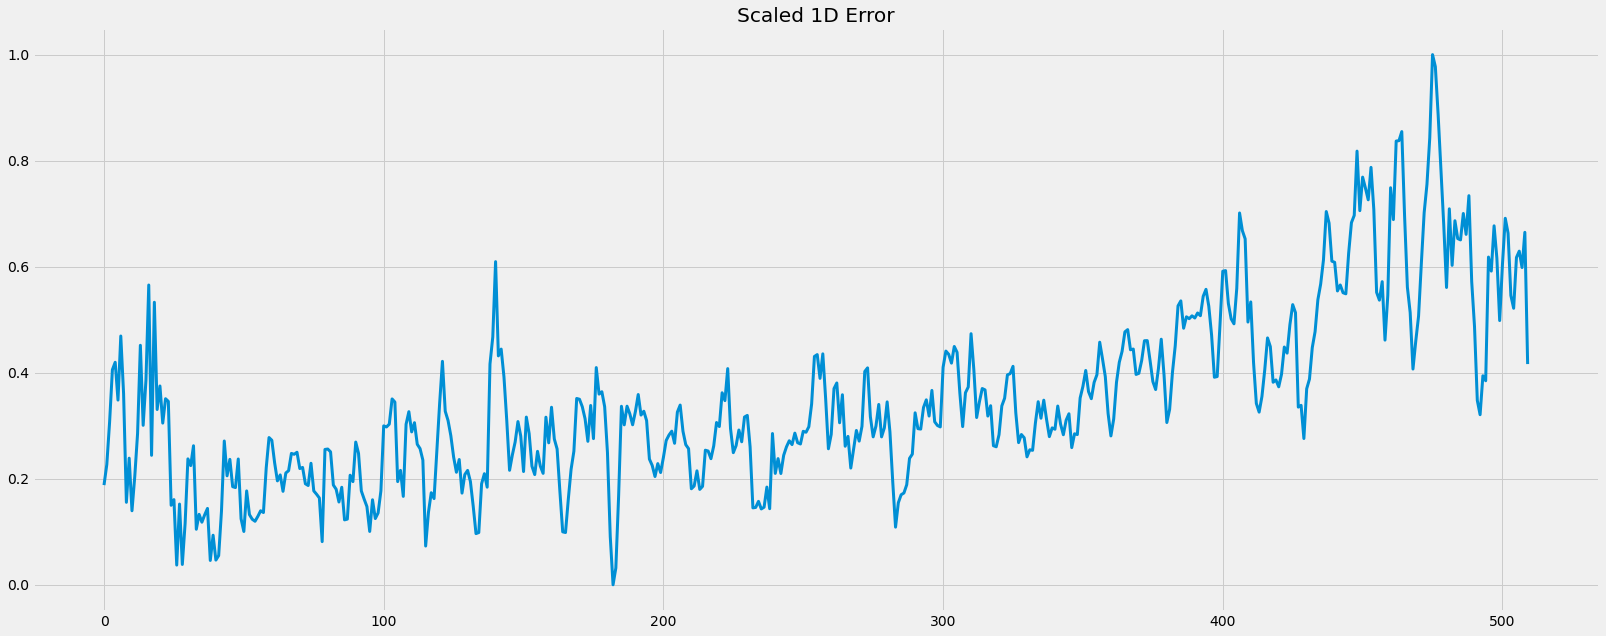

10.813100388470819


In [29]:
#get the root mean squared error (RMSE)
error = []
error.append(predictions - y_test)
nperr = np.array(predictions - y_test)
scaled_error = scaler.fit_transform(nperr)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error, linewidth=3)
plt.title("Scaled 1D Error")
plt.show()
rmse =  np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)
#print(predictions)

In [30]:
# THE ERROR MODEL
nperr.shape
print(type(nperr))
training_errdata_len = math.ceil(len(nperr)*0.8)
training_errdata_len


<class 'numpy.ndarray'>


408

In [31]:
#Scale the error data
errscaler = MinMaxScaler(feature_range=(0,1))
scaled_errdata = errscaler.fit_transform(nperr)


In [32]:
#creating the error training data set
#create the scaled error training data set
train_errdata = scaled_errdata[0:training_errdata_len,:]
#split the data into x_errtrain and y_errtrain data sets
x_errtrain = []
y_errtrain = []
for i in range(60, len(train_errdata)):
    x_errtrain.append(train_errdata[i-60:i,0])
    y_errtrain.append(train_errdata[i,0])
    if i<=61:
        print(x_errtrain)
        print(y_errtrain)
        print()

[array([0.18802793, 0.22689188, 0.30689448, 0.40561943, 0.41969374,
       0.34835781, 0.46924579, 0.36053893, 0.15555102, 0.23883603,
       0.13962706, 0.2044269 , 0.28530468, 0.45174517, 0.30077465,
       0.38617287, 0.56543612, 0.24419048, 0.53291632, 0.33060071,
       0.37500075, 0.30496569, 0.3509737 , 0.34590211, 0.15000034,
       0.16063119, 0.03717814, 0.15228169, 0.0383439 , 0.11578422,
       0.23750471, 0.22484429, 0.26227441, 0.10472898, 0.13290697,
       0.11807479, 0.13203265, 0.14402698, 0.04589392, 0.09351054,
       0.04661384, 0.05509136, 0.1390133 , 0.27121365, 0.20553541,
       0.23658685, 0.18506827, 0.18337474, 0.23729797, 0.1246394 ,
       0.1005463 , 0.17705439, 0.13237106, 0.12361582, 0.11981679,
       0.12904683, 0.1396069 , 0.13625544, 0.22071307, 0.27773729])]
[0.27260372855796094]

[array([0.18802793, 0.22689188, 0.30689448, 0.40561943, 0.41969374,
       0.34835781, 0.46924579, 0.36053893, 0.15555102, 0.23883603,
       0.13962706, 0.2044269 , 0.28

In [33]:
#Convert the X_errtrain and Y_errtrain to numpy arrays
x_errtrain , y_errtrain = np.array(x_errtrain), np.array(y_errtrain)

In [34]:
#Reshape the error data
x_errtrain = np.reshape(x_errtrain,(x_errtrain.shape[0],x_errtrain.shape[1],1))
x_errtrain.shape

(348, 60, 1)

In [35]:
#Building the LSTM error model
errmodel = Sequential()
errmodel.add(LSTM(50, return_sequences=True, input_shape =(x_errtrain.shape[1],1)))

#adding a fourth fifth layer and some Dropout regularistion
errmodel.add(LSTM(units = 50, return_sequences = False))

errmodel.add(Dense(25))
errmodel.add(Dense(1))

In [36]:
#compile the error Model
errmodel.compile(optimizer='adam', loss='mean_squared_error')


In [37]:
#train the error model
errmodel.fit(x_errtrain, y_errtrain, batch_size=32, epochs=ERR_EPOCHS)

Epoch 1/120
11/11 [==============================] - 4s 39ms/step - loss: 0.0298
Epoch 2/120
11/11 [==============================] - 0s 39ms/step - loss: 0.0091
Epoch 3/120
11/11 [==============================] - 0s 38ms/step - loss: 0.0082
Epoch 4/120
11/11 [==============================] - 0s 38ms/step - loss: 0.0075
Epoch 5/120
11/11 [==============================] - 0s 38ms/step - loss: 0.0070
Epoch 6/120
11/11 [==============================] - 0s 36ms/step - loss: 0.0071
Epoch 7/120
11/11 [==============================] - 0s 36ms/step - loss: 0.0070
Epoch 8/120
11/11 [==============================] - 0s 38ms/step - loss: 0.0069
Epoch 9/120
11/11 [==============================] - 0s 37ms/step - loss: 0.0067
Epoch 10/120
11/11 [==============================] - 0s 37ms/step - loss: 0.0065
Epoch 11/120
11/11 [==============================] - 0s 39ms/step - loss: 0.0066
Epoch 12/120
11/11 [==============================] - 0s 36ms/step - loss: 0.0065
Epoch 13/120
11/11 [=====

11/11 [==============================] - 0s 37ms/step - loss: 0.0025
Epoch 102/120
11/11 [==============================] - 0s 36ms/step - loss: 0.0026
Epoch 103/120
11/11 [==============================] - 0s 37ms/step - loss: 0.0025
Epoch 104/120
11/11 [==============================] - 0s 36ms/step - loss: 0.0025
Epoch 105/120
11/11 [==============================] - 0s 38ms/step - loss: 0.0026
Epoch 106/120
11/11 [==============================] - 0s 37ms/step - loss: 0.0026
Epoch 107/120
11/11 [==============================] - 0s 36ms/step - loss: 0.0025
Epoch 108/120
11/11 [==============================] - 0s 37ms/step - loss: 0.0027
Epoch 109/120
11/11 [==============================] - 0s 37ms/step - loss: 0.0025
Epoch 110/120
11/11 [==============================] - 0s 38ms/step - loss: 0.0026
Epoch 111/120
11/11 [==============================] - 1s 74ms/step - loss: 0.0026
Epoch 112/120
11/11 [==============================] - 1s 79ms/step - loss: 0.0026
Epoch 113/120
11/1

In [38]:
#create the testing error data set
#create a new array containing scaled values 
test_errdata = scaled_errdata[training_errdata_len - 60: , :]
#create the data sets x_errtest adn y_errtest
x_errtest = []
y_errtest = nperr[training_errdata_len:,:]
for i in range(60, len(test_errdata)):
    x_errtest.append(test_errdata[i-60:i,0])


In [39]:
#convert the error data to a numpy array
x_errtest = np.array(x_errtest)



In [40]:
#resahpe the error data
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))


In [41]:
#get the models predicted error values
errpredictions = errmodel.predict(x_errtest)
errpredictions = errscaler.inverse_transform(errpredictions)

(102, 1)


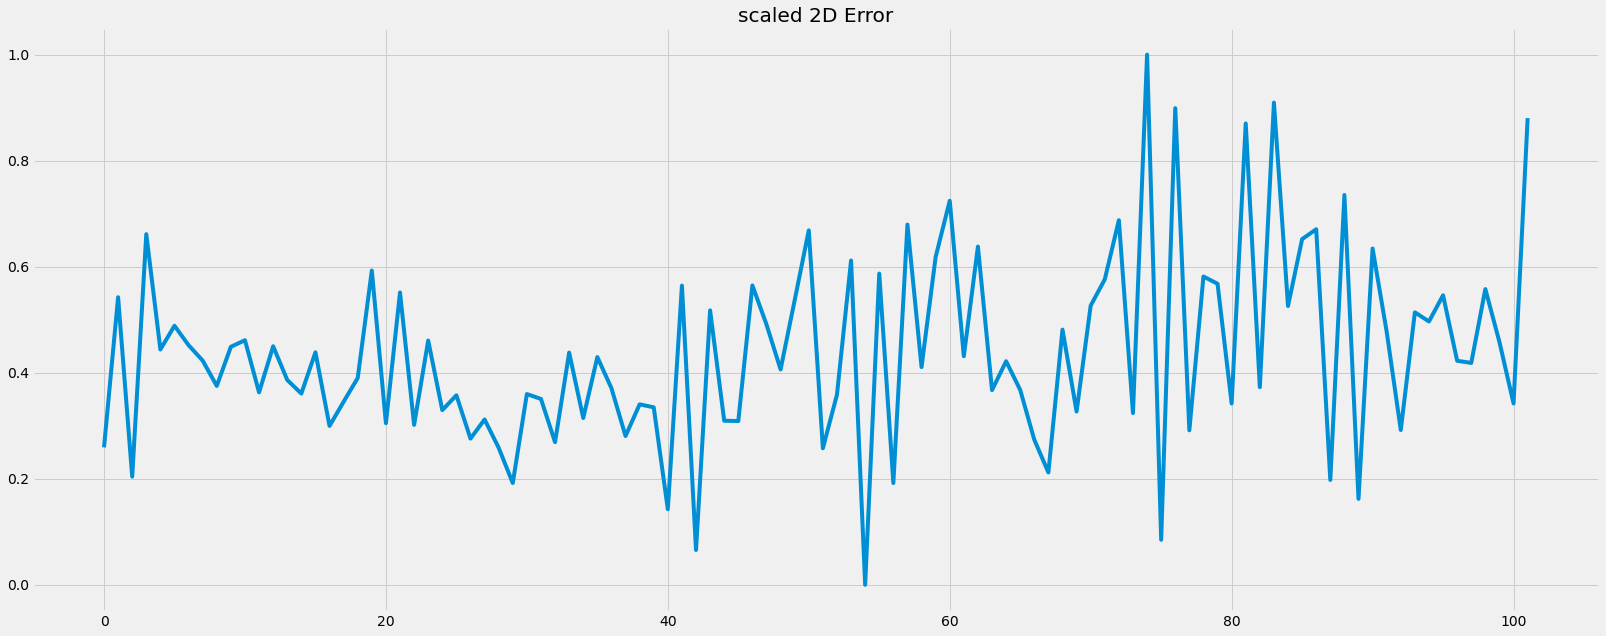

5.848489621106316


In [42]:
#get the root mean squared error (RMSE)
error2d = []
print(errpredictions.shape)
error2d.append(errpredictions - y_errtest)
nperr2d = np.array(errpredictions - y_errtest)
scaled_error2d = errscaler.fit_transform(nperr2d)
#print(nperr)
plt.figure(figsize=(25,10))
plt.plot(scaled_error2d)
plt.title('scaled 2D Error')
plt.show()
rmse2d =  np.sqrt(np.mean(errpredictions - y_errtest)**2)
print(rmse2d)
#print(errpredictions)

(510, 1)
         Error  Error Predictions    Error2d
408  32.496460          29.408932  -3.087528
409  21.331482          32.328163  10.996681
410  24.034698          18.202337  -5.832361
411  15.904755          32.817371  16.912617
412  10.410034          16.502045   6.092010
..         ...                ...        ...
505  29.999359          34.833725   4.834366
506  30.847809          42.607536  11.759727
507  28.645691          35.437317   6.791626
508  33.374176          34.406639   1.032463
509  15.693665          43.493511  27.799847

[102 rows x 3 columns]


C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


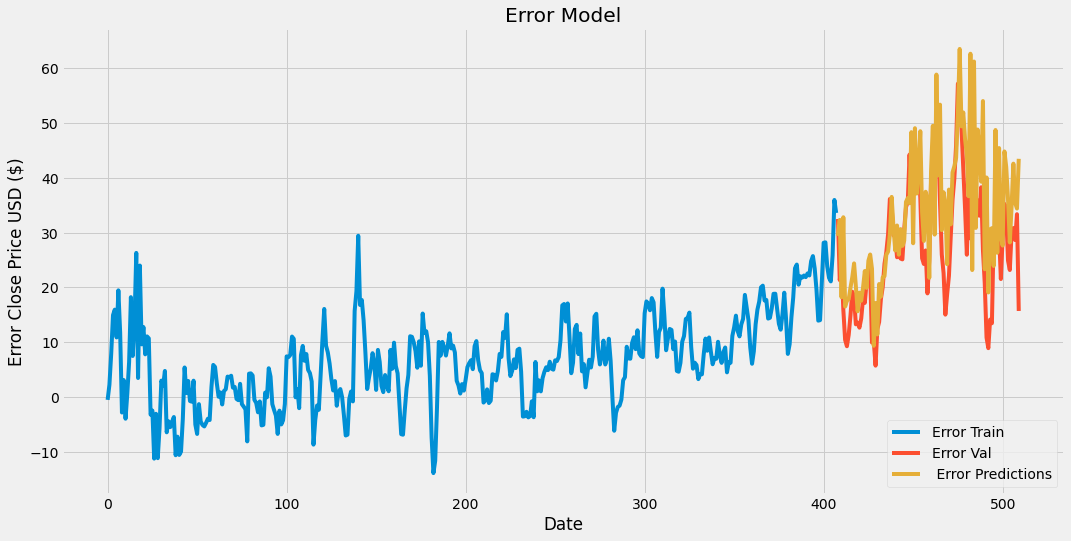

In [43]:
#plot the error data
print(nperr.shape)
dfnperr = pd.DataFrame(nperr, columns = ['Error'])
errtrain = dfnperr[:training_errdata_len]
errvalid = dfnperr[training_errdata_len:]
errvalid['Error Predictions'] = errpredictions
errvalid['Error2d'] = nperr2d
print(errvalid)
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Error Model')
plt.xlabel('Date')
plt.ylabel('Error Close Price USD ($)')
plt.plot(errtrain['Error'])
plt.plot(errvalid[['Error', 'Error Predictions']])
plt.legend(['Error Train', 'Error Val', ' Error Predictions'], loc='lower right')
plt.show()

C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Abhishek Rao\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


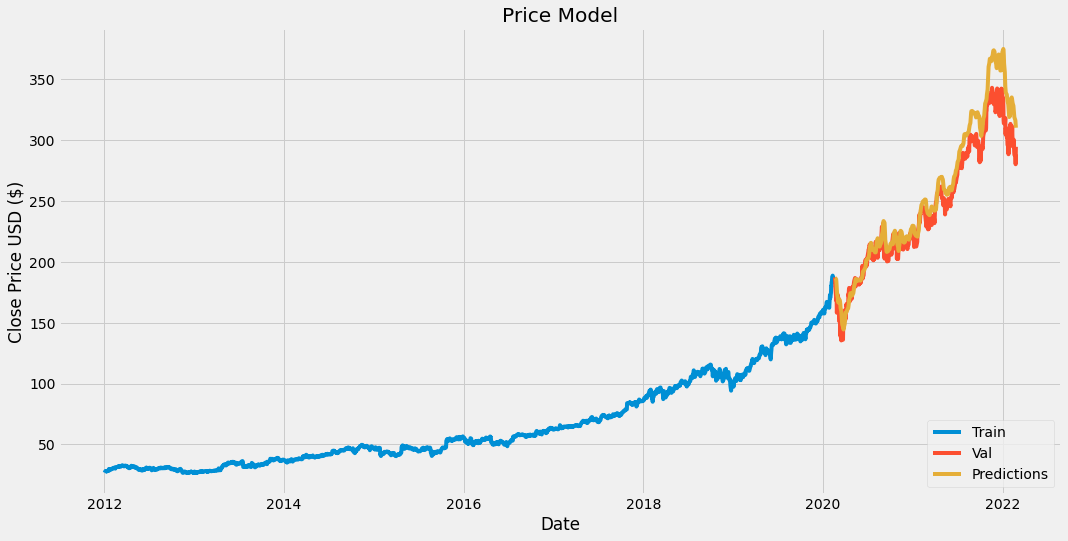

In [44]:
#plot the date
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
valid['Error'] = nperr
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Price Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()



In [45]:
#show the valid and predicted prices
valid

,Close,Predictions,Error
Date,,,
2020-02-19,187.279999,186.730087,-0.549911
2020-02-20,184.419998,186.635345,2.215347
2020-02-21,178.589996,186.497711,7.907715
2020-02-24,170.889999,185.822220,14.932220
2020-02-25,168.070007,184.003647,15.933640
...,...,...,...
2022-02-17,290.730011,320.729370,29.999359
2022-02-18,287.929993,318.777802,30.847809
2022-02-22,287.720001,316.365692,28.645691


In [50]:
#get the Quote
apple_quote = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
#create new data frame
new_df = apple_quote.filter(['Close'])
print(new_df.tail())
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_error = dfnperr[-60:].values
#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
last_60_days_scaled_error = errscaler.transform(last_60_days_error)
#create the empty list
x_test = []
x_errtest=[]
#append the past 60 days
x_test.append(last_60_days_scaled)
x_errtest.append(last_60_days_scaled_error)
#convert the x_test data set to a numpy array
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#print(x_test.shape)
#print(x_errtest.shape)
x_errtest = np.array(x_errtest)
x_errtest = np.reshape(x_errtest,(x_errtest.shape[0],x_errtest.shape[1],1))

#get the predicted scaled price
pred_price = model.predict(x_test)
pred_error = errmodel.predict(x_errtest)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
pred_error = errscaler.inverse_transform(pred_error)
print(pred_price)
print(pred_error)
new_df.tail()
dfnperr.tail()

                 Close
Date                  
2022-02-17  290.730011
2022-02-18  287.929993
2022-02-22  287.720001
2022-02-23  280.269989
2022-02-24  294.589996
[[178.87917]]
[[4.046149]]


,Error
505,29.999359
506,30.847809
507,28.645691
508,33.374176
509,15.693665


In [49]:
print("Prediction with 1-degree of correction")
print(pred_price[0][0]-pred_error[0][0])

Prediction with 1-degree of correction
174.83302


In [ ]:
apple_quote2 = web.DataReader(STOCK, data_source = 'yahoo', start=START_DATE, end=PREDICT_DATE)
print(apple_quote2['Close'])

In [ ]:
import joblib

joblib.dump(model,model_path)
    


In [ ]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)